# Initialize Environment

In [1]:
import sys
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

sys.path.append('/content/gdrive/My Drive/dm_image_classification')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

import numpy as np

from keras.applications.nasnet import NASNetLarge, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch import nn
from torchvision import models, transforms
from torch.utils.data import DataLoader

import pickle
import tqdm

from definitions import absolute_path, IMAGES_DIR, ANNOTATIONS_DIR

Using TensorFlow backend.


ModuleNotFoundError: ignored

# Load Classification Model

In [0]:
base_model = NASNetLarge(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(120, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

In [0]:
model.load_weights(absolute_path('weights-improvement-naslarge-01.hdf5'))

# Predict Class

In [0]:
with open(absolute_path('breed_list.pickle'), 'rb') as handle:
    breed_list = pickle.load(handle)

In [0]:
print(breed_list)

((0, 'n02085620-Chihuahua'), (1, 'n02085782-Japanese_spaniel'), (2, 'n02085936-Maltese_dog'), (3, 'n02086079-Pekinese'), (4, 'n02086240-Shih-Tzu'), (5, 'n02086646-Blenheim_spaniel'), (6, 'n02086910-papillon'), (7, 'n02087046-toy_terrier'), (8, 'n02087394-Rhodesian_ridgeback'), (9, 'n02088094-Afghan_hound'), (10, 'n02088238-basset'), (11, 'n02088364-beagle'), (12, 'n02088466-bloodhound'), (13, 'n02088632-bluetick'), (14, 'n02089078-black-and-tan_coonhound'), (15, 'n02089867-Walker_hound'), (16, 'n02089973-English_foxhound'), (17, 'n02090379-redbone'), (18, 'n02090622-borzoi'), (19, 'n02090721-Irish_wolfhound'), (20, 'n02091032-Italian_greyhound'), (21, 'n02091134-whippet'), (22, 'n02091244-Ibizan_hound'), (23, 'n02091467-Norwegian_elkhound'), (24, 'n02091635-otterhound'), (25, 'n02091831-Saluki'), (26, 'n02092002-Scottish_deerhound'), (27, 'n02092339-Weimaraner'), (28, 'n02093256-Staffordshire_bullterrier'), (29, 'n02093428-American_Staffordshire_terrier'), (30, 'n02093647-Bedlington_te

In [0]:
img = Image.open(absolute_path('german_shepherd_1.jpg')).resize((331, 331))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))

for i in probabilities[0].argsort()[-3:][::-1]:
    print(probabilities[0][i], "  :  ", breed_list[i])

plt.imshow(img)

AttributeError: ignored

0.9972817   :   (84, 'n02106662-German_shepherd')
0.0013466306   :   (76, 'n02105412-kelpie')
0.0011154659   :   (74, 'n02105162-malinois')


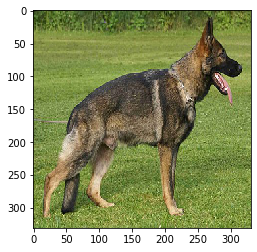

In [0]:
img = Image.open(absolute_path('german_shepherd_2.jpg')).resize((331, 331))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))

for i in probabilities[0].argsort()[-3:][::-1]:
    print(probabilities[0][i], "  :  ", breed_list[i])

plt.imshow(img)

0.9988813   :   (84, 'n02106662-German_shepherd')
0.00049987447   :   (76, 'n02105412-kelpie')
0.00014200187   :   (41, 'n02096177-cairn')


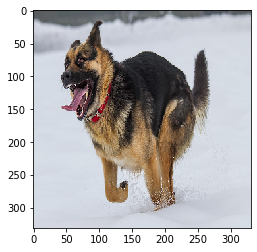

In [0]:
img = Image.open(absolute_path('german_shepherd_3.jpg')).resize((331, 331))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))

for i in probabilities[0].argsort()[-3:][::-1]:
    print(probabilities[0][i], "  :  ", breed_list[i])

plt.imshow(img)

0.93597955   :   (74, 'n02105162-malinois')
0.03222332   :   (84, 'n02106662-German_shepherd')
0.010791566   :   (76, 'n02105412-kelpie')


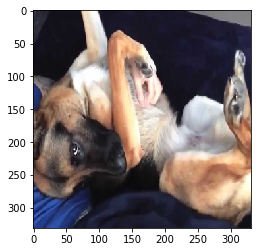

In [0]:
img = Image.open(absolute_path('german_shepherd_4.jpg')).resize((331, 331))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))

for i in probabilities[0].argsort()[-3:][::-1]:
    print(probabilities[0][i], "  :  ", breed_list[i])

plt.imshow(img)

In [0]:
from localization.model import LocalizationModel
from localization.dataset import LocalizationDataset

# Load Localization Model

In [0]:
model = LocalizationModel()
model.load_state_dict(torch.load(absolute_path('localization_01.pt')))

<All keys matched successfully>

In [0]:
test_tsfm = transforms.Compose([
        transforms.Resize([332, 332]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

# Define Test Data Source

In [0]:
with open(absolute_path('image_names.pickle'), 'rb') as handle:
    all_img_name = pickle.load(handle)

In [0]:
with open(absolute_path('annotation_names.pickle'), 'rb') as handle:
    all_annotation_name = pickle.load(handle)

# Localize Dogs in Images

In [0]:
img_idx = random.randint(0, len(all_img_name))
test_ds = LocalizationDataset(all_img_name[img_idx:img_idx+1], is_test=True, transform=test_tsfm)
test_dl = DataLoader(test_ds, batch_size=1)

tensor([1., 1., 1.])
145 188 96 275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


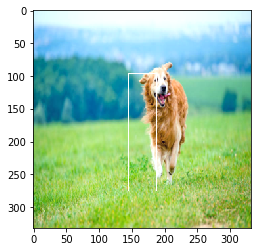

In [0]:
img_idx = random.randint(0, len(all_img_name))
test_ds = LocalizationDataset(['localization_01.jpg'], is_test=True, transform=test_tsfm)
test_dl = DataLoader(test_ds, batch_size=1)

model.eval()

for step, img in enumerate(test_dl):
    pred = model(img)

    origin_img = transforms.ToPILImage()(img.cpu().squeeze())

    xmin, ymin, xmax, ymax = tuple(pred.squeeze().tolist())

    display_img = np.add(np.divide(np.swapaxes(np.swapaxes(img[0], 0, 2), 0, 1), 4), 0.5)
    
    xmin = max(0,min(331,int(xmin)))
    xmax = max(0,min(331,int(xmax)))
    ymin = max(0,min(331,int(ymin)))
    ymax = max(0,min(331,int(ymax)))

    for i in range(ymin,ymax):
      display_img[i][xmin][0] = display_img[i][xmin][1] = display_img[i][xmin][2] = 1
      display_img[i][xmax][0] = display_img[i][xmax][1] = display_img[i][xmax][2] = 1

    for i in range(xmin,xmax):
      display_img[ymin][i][0] = display_img[ymin][i][1] = display_img[ymin][i][2] = 1
      display_img[ymax][i][0] = display_img[ymax][i][1] = display_img[ymax][i][2] = 1
    
    print(display_img[ymax,150])

    print(xmin, xmax, ymin, ymax)

    plt.clf()

    time.sleep(2)

    plt.imshow(display_img)

tensor([1., 1., 1.])
83 213 83 302


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


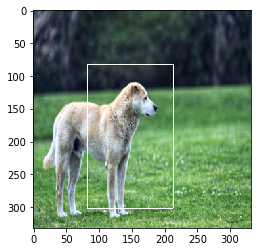

In [0]:
img_idx = random.randint(0, len(all_img_name))
test_ds = LocalizationDataset(['localization_02.jpg'], is_test=True, transform=test_tsfm)
test_dl = DataLoader(test_ds, batch_size=1)

model.eval()

for step, img in enumerate(test_dl):
    pred = model(img)

    origin_img = transforms.ToPILImage()(img.cpu().squeeze())

    xmin, ymin, xmax, ymax = tuple(pred.squeeze().tolist())

    display_img = np.add(np.divide(np.swapaxes(np.swapaxes(img[0], 0, 2), 0, 1), 4), 0.5)
    
    xmin = max(0,min(331,int(xmin)))
    xmax = max(0,min(331,int(xmax)))
    ymin = max(0,min(331,int(ymin)))
    ymax = max(0,min(331,int(ymax)))

    for i in range(ymin,ymax):
      display_img[i][xmin][0] = display_img[i][xmin][1] = display_img[i][xmin][2] = 1
      display_img[i][xmax][0] = display_img[i][xmax][1] = display_img[i][xmax][2] = 1

    for i in range(xmin,xmax):
      display_img[ymin][i][0] = display_img[ymin][i][1] = display_img[ymin][i][2] = 1
      display_img[ymax][i][0] = display_img[ymax][i][1] = display_img[ymax][i][2] = 1
    
    print(display_img[ymax,150])

    print(xmin, xmax, ymin, ymax)

    plt.clf()

    time.sleep(2)

    plt.imshow(display_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1., 1., 1.])
83 230 14 327


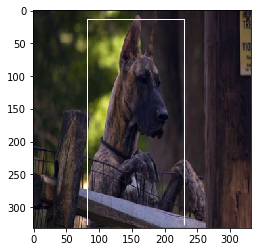

In [0]:
img_idx = random.randint(0, len(all_img_name))
test_ds = LocalizationDataset(all_img_name[img_idx:img_idx+1], is_test=True, transform=test_tsfm)
test_dl = DataLoader(test_ds, batch_size=1)

model.eval()

for step, img in enumerate(test_dl):
    pred = model(img)

    origin_img = transforms.ToPILImage()(img.cpu().squeeze())

    xmin, ymin, xmax, ymax = tuple(pred.squeeze().tolist())

    display_img = np.add(np.divide(np.swapaxes(np.swapaxes(img[0], 0, 2), 0, 1), 4), 0.5)
    
    xmin = max(0,min(331,int(xmin)))
    xmax = max(0,min(331,int(xmax)))
    ymin = max(0,min(331,int(ymin)))
    ymax = max(0,min(331,int(ymax)))

    for i in range(ymin,ymax):
      display_img[i][xmin][0] = display_img[i][xmin][1] = display_img[i][xmin][2] = 1
      display_img[i][xmax][0] = display_img[i][xmax][1] = display_img[i][xmax][2] = 1

    for i in range(xmin,xmax):
      display_img[ymin][i][0] = display_img[ymin][i][1] = display_img[ymin][i][2] = 1
      display_img[ymax][i][0] = display_img[ymax][i][1] = display_img[ymax][i][2] = 1
    
    print(display_img[ymax,150])

    print(xmin, xmax, ymin, ymax)

    plt.clf()

    plt.imshow(display_img)